In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
from infomap import Infomap
from operator import itemgetter

In [5]:
data = pd.read_csv('./connections.txt',delimiter=' ',names = ['from','to'])

# Tasks

### 1. Create a Directed graph

In [6]:
graph = nx.DiGraph(edges)
graph.add_edges_from(data.to_numpy())

### 2. Show which nodes are bridges

In [7]:
bridges =list(nx.bridges(graph.to_undirected()))
merged = list(itertools.chain(*bridges))
bridge_nodes = set(merged)
print(bridge_nodes)

{0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


### 3. Show the density of the graph. Comment about your findings 

In [8]:
graph_density = nx.density(graph)
print("Graph Density:", graph_density)

Graph Density: 0.0054099817517196435


The graph has a low density, which implies that there are many nodes in the data, but they are not very well connected to each other. 

### 4. Show which nodes have the highest and lowest number of connections. 

In [9]:
node_degrees = graph.degree()
max_degree_node = max(node_degrees, key=lambda x: x[1])
min_degree_node = min(node_degrees, key=lambda x: x[1])

print("Node with the highest degree:", max_degree_node)
print("Node with the lowest degree:", min_degree_node)

Node with the highest degree: (107, 1045)
Node with the lowest degree: (11, 1)


### 5. Show which nodes have the highest incoming and outgoing connections 

In [10]:
in_degrees = graph.in_degree()
out_degrees = graph.out_degree()

max_in_degree_node = max(in_degrees, key=lambda x: x[1])
max_out_degree_node = max(out_degrees, key=lambda x: x[1])

print("Node with the highest incoming connections:", max_in_degree_node)
print("Node with the highest outgoing connections:", max_out_degree_node)

Node with the highest incoming connections: (1888, 251)
Node with the highest outgoing connections: (107, 1043)


### 6. Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings

In [11]:
betweenness = nx.centrality.betweenness_centrality(graph)
highest_betweenness_node = max(graph.nodes, key=betweenness.get)
b=betweenness[highest_betweenness_node]
print("Highest Betweenness Node: {} {}Betweenness: {}".format(highest_betweenness_node,'\n',b ,'\n'))

closeness = nx.centrality.closeness_centrality(graph)
highest_closeness_node = max(graph.nodes, key=closeness.get)
c=closeness[highest_closeness_node]
print("Highest Closeness Node: {} {}Closeness: {}".format(highest_closeness_node,'\n',c,'\n'))

eigenvector = nx.centrality.eigenvector_centrality(graph, max_iter = 800)
highest_eigenvector_node = max(graph.nodes, key=eigenvector.get)
e=eigenvector[highest_eigenvector_node]
print("Highest Eigan Vector Node: {} {}Eigan Vector: {}".format(highest_eigenvector_node, '\n', e))

Highest Betweenness Node: 1684 
Betweenness: 0.03299985344063623
Highest Closeness Node: 2642 
Closeness: 0.11797503012816456
Highest Eigan Vector Node: 2655 
Eigan Vector: 0.802704299670652


### 7. Implement a community detection algorithm on the directed graph and show how many communities were created. 

In [12]:
def findCommunities(graph):
    
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    
    for e in graph.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,
    im.codelength))
    communities = {}
    
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(graph, communities,'community')
    
    return im.num_top_modules, communities

v=findCommunities(graph)
print("Found", v[0], "communities")

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 96 communities with codelength: 6.58817364825253
Found 96 communities


### 8.  Show the largest and the smallest community. | Interpret your findings

In [13]:
c = Counter(v[1].values())

largest_community = sorted(c, key = c.get, reverse = True)[:1]
smallest_community = sorted(c, key = c.get, reverse = False)[:1]

print("Largest community:", largest_community)
print("Smallest community:", smallest_community)

Largest community: [5]
Smallest community: [36]


### 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw. 

The highest 3 communities are [5, 2, 3]


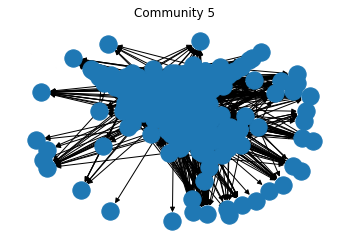

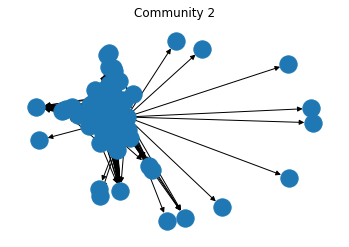

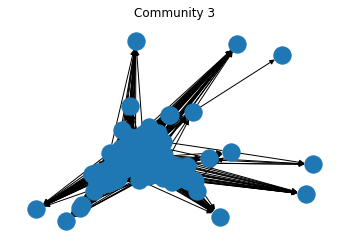

In [15]:
largest_communities = sorted(c, key=c.get, reverse=True)[:3]
print("The highest 3 communities are", largest_communities)

for i in largest_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == i)
    sg = graph.subgraph(list(selected_data.keys()))
    
    fig, ax = plt.subplots()
    
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos, ax=ax)
    
    plt.title(f"Community {i}")
    plt.show()

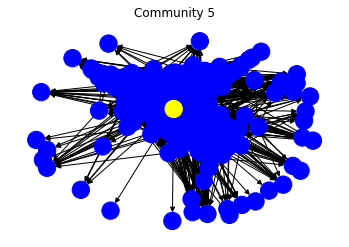

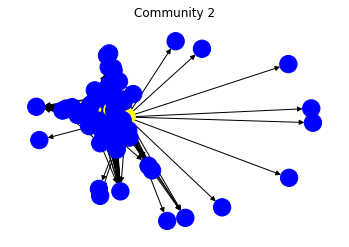

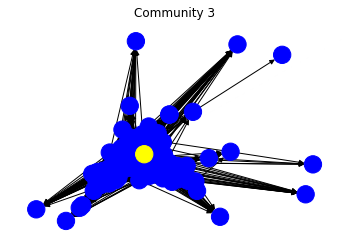

In [17]:
# degree centrality
empty_list = []

for i in largest_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == i)
    sg = graph.subgraph(list(selected_data.keys()))
    
    degree_centrality = nx.degree_centrality(sg).items()
    nodes_to_delete = sorted(degree_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    
    for node in nodes_to_delete:
        empty_list.append(node)
                        
    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    
    fig, ax = plt.subplots()
    
    nx.draw(sg, pos=pos, node_color=color_, ax=ax)
    plt.title(f"Community {i}")
    
    plt.show()
    plt.close()

In [18]:
len(empty_list)

9

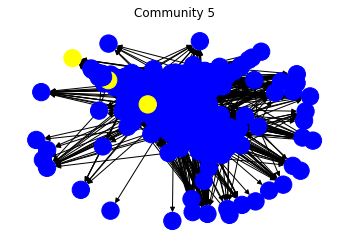

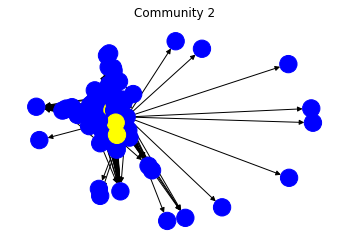

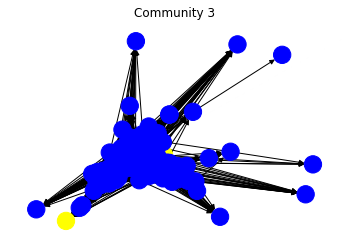

In [23]:
#closeness centrality
empty_list = []

for i in largest_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == i)
    sg = graph.subgraph(list(selected_data.keys()))

    closeness_centrality = nx.closeness_centrality(sg).items()
    nodes_to_delete = sorted(closeness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]

    for node in nodes_to_delete:
        empty_list.append(node)

    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed=5656)

    fig, ax = plt.subplots()
    nx.draw(sg, pos=pos, node_color=color_, ax=ax)
    plt.title(f"Community {i}")

    plt.show()
    
    plt.close()

In [24]:
len(empty_list)

9

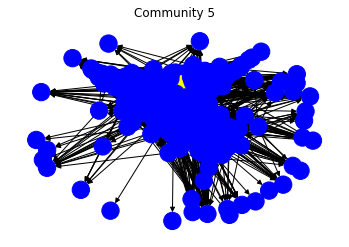

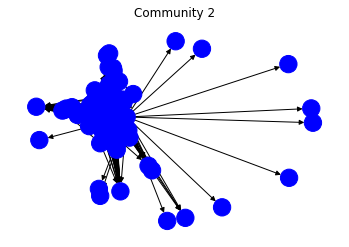

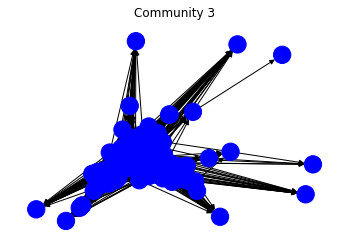

In [26]:
#betweenness centrality
empty_list = []

for i in largest_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == i)
    sg = graph.subgraph(list(selected_data.keys()))

    betweenness_centrality = nx.betweenness_centrality(sg).items()
    nodes_to_delete = sorted(betweenness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]

    for node in nodes_to_delete:
        empty_list.append(node)

    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed=5656)

    fig, ax = plt.subplots()
    nx.draw(sg, pos=pos, node_color=color_, ax=ax)
    plt.title(f"Community {i}")

    plt.show()
    
    plt.close()

In [27]:
len(empty_list)

9

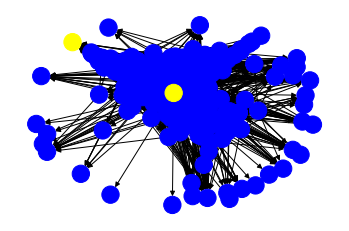

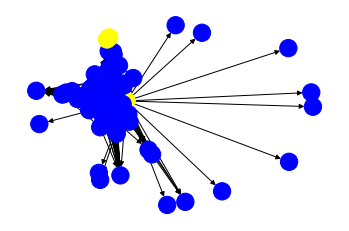

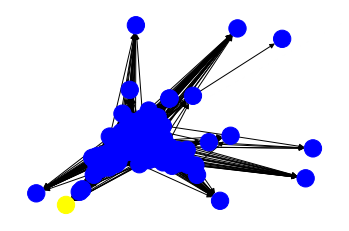

In [29]:
#eigenvector_centrality
empty_list = []

for community in largest_communities:
    selected_data = dict((n, d['community']) for n, d in graph.nodes().items() if d['community'] == community)
    sg = graph.subgraph(list(selected_data.keys()))

    eigenvectors_centrality = nx.centrality.eigenvector_centrality(sg, max_iter=1300)
    eigenvectors_ = nx.centrality.eigenvector_centrality(sg.reverse(), max_iter=1300)

    for node in eigenvectors_centrality.keys():
        eigenvectors_centrality[node] = (eigenvectors_centrality[node] + eigenvectors_[node]) / 2

    nodes_to_delete = sorted(eigenvectors_centrality, key=lambda pair: -eigenvectors_centrality[pair])[:3]

    for i in nodes_to_delete:
        empty_list.append(i)

    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed=5656)

    fig, ax = plt.subplots()
    nx.draw(sg, pos=pos, node_color=color_, ax=ax)

    plt.show()
    plt.close()

In [30]:
len(empty_list)

9

### 10. Draw the influencers of those top 3 communities

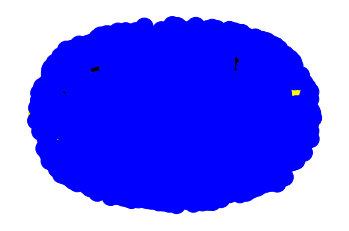

In [32]:
influencers_list = set(empty_list)

pos = nx.spring_layout(graph, seed=5656)
color_ = ['yellow' if node in influencers_list else "blue" for node in graph]

fig, ax = plt.subplots()
nx.draw(graph, pos=pos, node_color=color_, ax=ax)

plt.show()

### 11. Design an action plan: 

#### a. Use hypothetical business (telecom, marketing agency, etc.)
- Let's assume we're working with X Marketing Agency

#### b. Use a hypothetical marketing budget 
- The hypothetical budget is 10,000 USD

#### c. Use a hypothetical cost per action (advertisement cost) 
- Let's assume a cost per action of 1 USD

#### d. Decide whom should you target? 